In [13]:
"""
Creates a randomized influence network and simulates over all possible initial configs
Learns the influence network edge weights using local learner for each node - assumes full observations given
Prints train/test error rate for each node as well as the # rounds taken during training

"""

import Network
import DataGen
import FullObservationLearner
import importlib
import numpy as np
import matplotlib.pyplot as plt


In [25]:
# example of various functionality
N = 10

importlib.reload(Network)

graph = Network.RandomNetwork(num_nodes=N, sparsity=0.5, normalize_incoming=True)


In [26]:
vis = False

"""
For visualization of network
Works best when N is small, otherwise the edge labels get too crowded

"""
if(vis):
    import networkx as nx
    import matplotlib.pyplot as plt
    plt.rcParams['figure.dpi'] = 200

    G = nx.from_numpy_matrix(graph.weights, create_using=nx.DiGraph)  
    layout = nx.planar_layout(G)
    #layout = nx.spring_layout(G)
    nx.draw(G, pos = layout, with_labels=True) 
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels, label_pos=.5)
    plt.show()

In [27]:
importlib.reload(DataGen)
data = DataGen.genSamples(graph)


In [28]:
importlib.reload(FullObservationLearner)

f = np.arange(.1,1.1,.1)

test_err_data = []
train_err_data = []
naive0_err_data = []
naive1_err_data = []

for fraction in f:
    train_errs = []
    test_errs = []
    naive0_errs = []
    naive1_errs = []
    
    for i in range(N):
        #print("NODE " + str(i))
        (train_err, test_err, naive_0_err, naive_1_err) = FullObservationLearner.learn(node=i, input_data=data, test_size = 0.25, fraction=fraction)
        train_errs.append(train_err)
        test_errs.append(test_err)
        naive0_errs.append(naive_0_err)
        naive1_errs.append(naive_1_err)

    mean_train_err = sum(train_errs) / len(train_errs)
    mean_test_err = sum(test_errs) / len(test_errs)
    mean_naive0_err = sum(naive0_errs) / len(naive0_errs)
    mean_naive1_err = sum(naive1_errs) / len(naive1_errs)
    
    test_err_data.append(mean_test_err)
    train_err_data.append(mean_train_err)
    naive0_err_data.append(mean_naive0_err)
    naive1_err_data.append(mean_naive1_err)
    
    
    
    

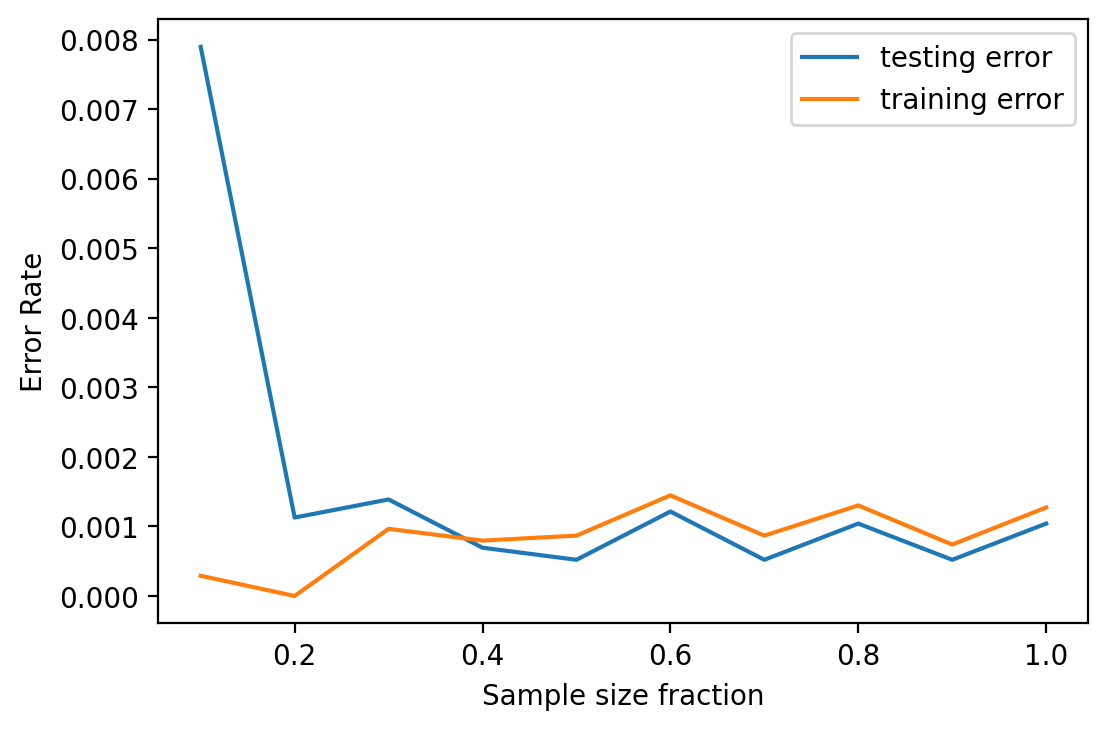

In [29]:
plt.rcParams['figure.dpi'] = 200
plt.plot(f, test_err_data, label = 'testing error')
plt.plot(f,train_err_data, label='training error')
#plt.plot(f, naive0_err_data, label = 'naive 0 testing error')
#plt.plot(f,naive1_err_data, label='naive 1 training error')
plt.legend(loc="upper right")
plt.xlabel("Sample size fraction")
plt.ylabel("Error Rate")

plt.show()

In [24]:
print(sum(naive0_err_data)/len(naive0_err_data))
print(sum(naive1_err_data)/len(naive1_err_data))

0.8658854166666667
0.1341145833333333
